In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import kerastuner as kt
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from sklearn import metrics
import pickle

In [2]:
TrainTx = pd.read_csv('../input/type-data-nbaiot-processed/TrainTx.csv')
TrainTy = pd.read_csv('../input/type-data-nbaiot-processed/TrainTy.csv')
ValTx = pd.read_csv('../input/type-data-nbaiot-processed/ValTx.csv')
ValTy = pd.read_csv('../input/type-data-nbaiot-processed/ValTy.csv')

In [3]:
with open('../input/type-models/XGboost_type.pkl', 'rb') as file:
    xgb = pickle.load(file)
with open('../input/type-models/ANN.pkl', 'rb') as file:
    ann = pickle.load(file)
with open('../input/type-models/RNNTyrpe.pkl', 'rb') as file:
    rnn = pickle.load(file)
with open('../input/type-models/RFType.pkl', 'rb') as file:
    rf = pickle.load(file)

## Prediction probabilites from individual models

In [4]:
predictionProbTrain1 = pd.DataFrame(xgb.predict_proba(TrainTx))
predictionProbTrain3 = pd.DataFrame(ann.predict(TrainTx))
predictionProbTrain4 = pd.DataFrame(rnn.predict(TrainTx))
predictionProbTrain5 = pd.DataFrame(rf.predict_proba(TrainTx))

9529/9529 [==============================] - 55s 6ms/step


In [5]:
probTrains = [predictionProbTrain1, predictionProbTrain3, predictionProbTrain4, predictionProbTrain5]
predictionFrameInputTrain = pd.concat(probTrains, axis = 1)

In [6]:
predictionFrameInputTrain

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,9.403391e-07,1.841678e-06,1.039535e-06,6.170528e-06,2.497379e-07,5.570773e-07,6.041644e-07,9.999374e-01,4.532273e-05,5.994673e-07,...,0.0,0.0,0.0,0.00000,0.00000,0.0,1.0,0.0,0.0,0.0
1,2.002471e-06,1.266931e-06,1.792974e-06,6.868398e-07,9.999859e-01,1.242317e-06,1.888933e-06,1.890771e-06,6.120251e-07,2.136042e-07,...,0.0,0.0,0.0,0.50047,0.49953,0.0,0.0,0.0,0.0,0.0
2,5.006526e-07,2.734322e-06,4.379057e-06,1.863348e-06,2.081042e-07,2.482436e-07,1.522561e-07,3.412053e-06,9.999832e-01,4.912703e-07,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,1.0,0.0,0.0
3,1.419050e-05,5.037217e-06,2.713295e-05,9.998734e-01,7.162365e-07,1.321641e-06,2.751946e-06,2.267984e-05,3.244306e-05,1.256362e-06,...,0.0,0.0,1.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
4,8.571375e-07,6.029474e-07,4.599203e-07,1.086548e-06,5.313345e-07,5.038833e-07,9.992831e-01,8.825944e-07,8.647323e-07,2.257060e-06,...,0.0,0.0,0.0,0.00000,0.00000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304919,5.552478e-05,1.955096e-05,1.484849e-05,9.997694e-01,1.517795e-05,1.456189e-06,1.904694e-06,8.647003e-05,1.100306e-05,1.835351e-06,...,0.0,0.0,1.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
304920,5.029565e-07,9.999672e-01,2.261761e-05,9.140883e-07,4.640541e-07,4.258469e-07,5.226848e-07,1.220300e-06,2.120379e-06,4.231007e-07,...,1.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
304921,7.389630e-07,4.369203e-06,1.346842e-06,5.766749e-06,3.010937e-07,6.889574e-07,4.570032e-07,9.999648e-01,1.558674e-05,6.172277e-07,...,0.0,0.0,0.0,0.00000,0.00000,0.0,1.0,0.0,0.0,0.0
304922,5.308845e-07,9.997831e-01,2.099771e-04,6.807460e-07,4.898219e-07,3.689670e-07,4.093201e-07,4.994652e-07,1.118731e-06,7.820005e-07,...,1.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0


In [7]:
predictionProbVal1 = pd.DataFrame(xgb.predict_proba(ValTx))
predictionProbVal3 = pd.DataFrame(ann.predict(ValTx))
predictionProbVal4 = pd.DataFrame(rnn.predict(ValTx))
predictionProbVal5 = pd.DataFrame(rf.predict_proba(ValTx))

4084/4084 [==============================] - 23s 6ms/step


In [8]:
probVals = [predictionProbVal1, predictionProbVal3, predictionProbVal4, predictionProbVal5]
predictionFrameInputVal = pd.concat(probVals, axis = 1)

In [9]:
predictionFrameInputVal

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,9.587311e-07,6.907490e-07,5.652755e-07,1.118348e-06,5.943117e-07,5.636068e-07,9.992082e-01,9.872052e-07,9.678571e-07,6.941923e-05,...,0.0,0.0,0.0,0.00000,0.00000,1.000,0.0,0.0,0.000000,0.000000
1,1.081304e-06,6.739189e-07,1.133714e-06,7.809570e-07,3.648360e-07,6.778417e-07,1.314840e-05,2.635735e-06,5.632145e-07,9.999765e-01,...,0.0,0.0,0.0,0.00000,0.00000,0.000,0.0,0.0,1.000000,0.000000
2,7.383148e-07,5.518262e-06,1.358300e-06,7.577985e-06,2.673239e-07,4.743519e-07,4.924718e-07,9.999571e-01,1.868835e-05,1.478144e-06,...,0.0,0.0,0.0,0.00000,0.00000,0.000,1.0,0.0,0.000000,0.000000
3,5.617405e-07,9.999747e-01,1.761895e-05,7.636895e-07,5.182914e-07,3.904125e-07,7.236773e-07,7.141842e-07,9.850687e-07,3.341605e-07,...,1.0,0.0,0.0,0.00000,0.00000,0.000,0.0,0.0,0.000000,0.000000
4,1.751711e-06,2.143288e-06,1.855360e-06,2.642380e-06,9.267334e-07,1.687064e-06,7.411576e-05,1.158714e-06,1.292228e-06,9.886114e-01,...,0.0,0.0,0.0,0.00000,0.00000,0.000,0.0,0.0,0.973778,0.026222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130678,2.002471e-06,1.266931e-06,1.792974e-06,6.868398e-07,9.999859e-01,1.242317e-06,1.888933e-06,1.890771e-06,6.120251e-07,2.136042e-07,...,0.0,0.0,0.0,0.50047,0.49953,0.000,0.0,0.0,0.000000,0.000000
130679,2.559237e-06,1.619817e-05,5.066323e-06,3.764570e-06,1.484175e-06,1.688569e-06,9.950293e-01,4.503624e-06,4.008862e-06,2.329286e-06,...,0.0,0.0,0.0,0.00000,0.00000,0.978,0.0,0.0,0.000000,0.022000
130680,3.345795e-06,9.994566e-01,4.938215e-04,4.173702e-06,3.003130e-06,2.262163e-06,2.420293e-07,3.041733e-06,8.861701e-06,1.103477e-05,...,1.0,0.0,0.0,0.00000,0.00000,0.000,0.0,0.0,0.000000,0.000000
130681,1.437145e-06,1.498473e-06,2.461193e-06,1.864113e-06,1.041901e-06,1.123863e-06,2.107502e-04,1.541927e-06,1.720288e-06,1.766117e-05,...,0.0,0.0,0.0,0.00000,0.00000,0.000,0.0,0.0,0.000000,1.000000


## Final Model

In [10]:
def build_model(hp):
    model = Sequential()
    counter=0
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=48, step=8), activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']), input_dim=44))
        else:
            model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=48, step=8), activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))
        counter += 1
    model.add(Dense(11, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
tuner= kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

In [16]:
tuner.search(predictionFrameInputTrain, TrainTy, epochs=5, validation_data = (predictionFrameInputVal, ValTy))

Trial 5 Complete [00h 02m 17s]
val_accuracy: 0.9988062977790833

Best val_accuracy So Far: 0.9988980889320374
Total elapsed time: 00h 15m 22s


In [17]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1800      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 11)                451       
                                                                 
Total params: 5531 (21.61 KB)
Trainable params: 5531 (21.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
x = tuner.get_best_hyperparameters()[0]
layerCount = x['num_layers']
for i in range(layerCount):
    print('Layer'+str(i)+' is '+x['activation'+str(i)]+' with perceptron count of: '+str(x['units'+str(i)]))

Layer0 is sigmoid with perceptron count of: 40
Layer1 is sigmoid with perceptron count of: 40
Layer2 is sigmoid with perceptron count of: 40


## Accuracies

In [28]:
def accFinder(X, y):
    preds = pd.DataFrame(pd.DataFrame(best_model.predict(X)).idxmax(axis=1))
    return metrics.accuracy_score(preds, y)

In [31]:
acc_card = []

In [32]:
acc_card.append(accFinder(predictionFrameInputTrain, TrainTy))

9529/9529 [==============================] - 13s 1ms/step


In [33]:
acc_card.append(accFinder(predictionFrameInputVal, ValTy))

4084/4084 [==============================] - 5s 1ms/step


In [34]:
TestTx = pd.read_csv('../input/type-data-nbaiot-processed/TestTx.csv')
TestTy = pd.read_csv('../input/type-data-nbaiot-processed/TestTy.csv')

In [35]:
predictionProbTest1 = pd.DataFrame(xgb.predict_proba(TestTx))
predictionProbTest3 = pd.DataFrame(ann.predict(TestTx))
predictionProbTest4 = pd.DataFrame(rnn.predict(TestTx))
predictionProbTest5 = pd.DataFrame(rf.predict_proba(TestTx))

5835/5835 [==============================] - 36s 6ms/step


In [36]:
probTests = [predictionProbTest1, predictionProbTest3, predictionProbTest4, predictionProbTest5]
predictionFrameInputTest = pd.concat(probTests, axis = 1)

In [37]:
acc_card.append(accFinder(predictionFrameInputTest, TestTy))

5835/5835 [==============================] - 8s 1ms/step


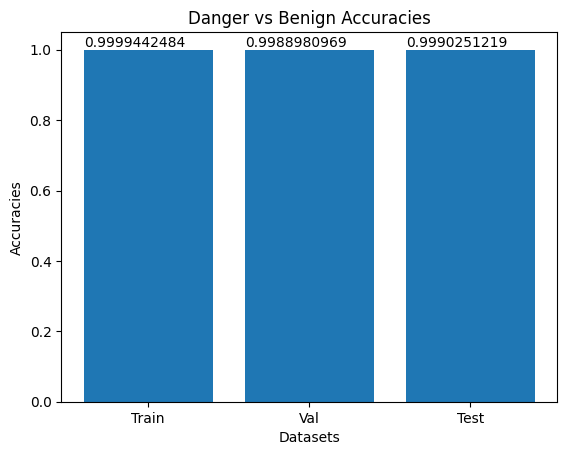

In [39]:
# Create a list of indices for the x-axis
indices = range(len(acc_card))
# Create the bar graph
bars = plt.bar(indices, acc_card)
# Optionally, you can set the labels for the x-axis to be something other than the indices
labels = ['Train', 'Val', 'Test']
plt.xticks(indices, labels)
# Labeling the axes
plt.xlabel('Datasets')
plt.ylabel('Accuracies')
# Giving a title to the graph
plt.title('Danger vs Benign Accuracies')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, '{:.10f}'.format(yval), va='bottom') # va: vertical alignment
plt.show()

## Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
TestPreds = pd.DataFrame(best_model.predict(predictionFrameInputTest)).idxmax(axis=1)

5835/5835 [==============================] - 8s 1ms/step


In [42]:
Labels = range(11)

In [44]:
cm = pd.DataFrame(confusion_matrix(pd.DataFrame(TestPreds), TestTy, labels = Labels))
cm

,0,1,2,3,4,5,6,7,8,9,10
0,18625,1,0,10,7,3,1,0,0,1,0
1,0,18571,20,4,0,0,0,1,4,0,0
2,0,10,9251,0,0,0,7,0,2,4,1
3,13,1,3,9396,1,5,0,3,0,0,0
4,0,0,0,0,18637,5,0,0,2,0,0
5,0,0,0,1,0,18664,0,0,0,0,0
6,2,0,0,0,0,0,18618,0,0,6,13
7,0,0,0,0,0,0,1,18841,1,0,1
8,1,0,0,0,0,0,0,1,18703,0,0
9,0,0,0,0,0,0,1,0,0,18501,11


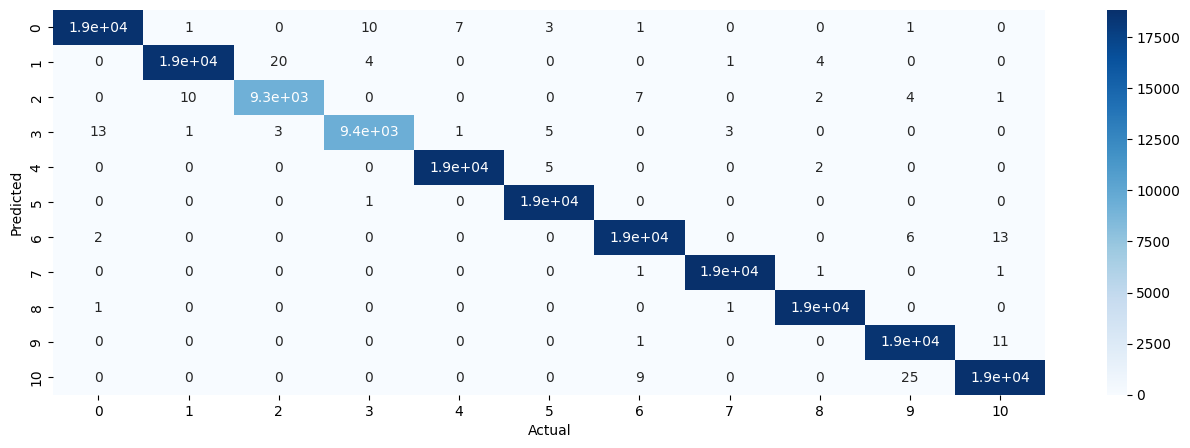

In [49]:
plt.figure(figsize=(16, 5))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [54]:
def recall(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=Labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[i][type]
    return true/total

def precision(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=Labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[type][i]
    return true/total

def specificity(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=Labels)
    true = 0
    for i in range(len(labels)):
        if(i==type):
            continue;
        true += confMat[i][i]
    total = 0
    for j in range(len(labels)):
        if(j==type):
            continue
        for i in range(len(labels)):
            total += confMat[i][j]
    return true/total

In [58]:
for i in range(len(Labels)):
    print('recall of class '+str(i)+': '+str(recall(i, TestPreds, TestTy, Labels)))

recall of class 0: 0.9991416769486615
recall of class 1: 0.9993542485066996
recall of class 2: 0.9975199482423981
recall of class 3: 0.9984061204972904
recall of class 4: 0.9995709305443818
recall of class 5: 0.9993039567382342
recall of class 6: 0.9989805226163009
recall of class 7: 0.9997346917117691
recall of class 8: 0.9995190252244549
recall of class 9: 0.9980579381776986
recall of class 10: 0.9986116302664602


In [59]:
for i in range(len(Labels)):
    print('precision of class '+str(i)+': '+str(precision(i, TestPreds, TestTy, Labels)))

precision of class 0: 0.9987666237666237
precision of class 1: 0.9984408602150537
precision of class 2: 0.9974123989218329
precision of class 3: 0.9972405009552112
precision of class 4: 0.9996245440892513
precision of class 5: 0.9999464237878382
precision of class 6: 0.9988733301142765
precision of class 7: 0.9998407981320314
precision of class 8: 0.9998930767174552
precision of class 9: 0.9993518068384378
precision of class 10: 0.9981852148385375


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32, whiten=True)

In [62]:
import joblib
dt = {
    'pca':pca,
    'xgb': xgb,
    'ann': ann,
    'rnn': rnn,
    'rf': rf,
    'Typefinal':best_model,
}
joblib.dump(dt, 'TypeModel.joblib')

['TypeModel.joblib']

In [63]:
import pickle as pkl

In [64]:
with open('Typefinal.pkl', 'wb') as file:
    pickle.dump(best_model, file)